# Modeling

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble  import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
feature_data_folder = './feature_data/'

In [ ]:
#load all features & labels
#hog features
train_hog = np.load(feature_data_folder + 'hog+/train_hog.npy')
test_hog = np.load(feature_data_folder + 'hog+/test_hog.npy')
val_hog = np.load(feature_data_folder + 'hog+/val_hog.npy')

#resnet feature maps
train_resnet = np.load(feature_data_folder + 'resnet50/train-fmaps.npy')
test_resnet = np.load(feature_data_folder + 'resnet50/test-fmaps.npy')
val_resnet = np.load(feature_data_folder + 'resnet50/val-fmaps.npy')

#glcm
train_glcm = np.load(feature_data_folder + 'glcm_scaled/train_glcm.npy')
val_glcm = np.load(feature_data_folder + 'glcm_scaled/val_glcm.npy')
test_glcm = np.load(feature_data_folder + 'glcm_scaled/val_glcm.npy')

#load labels
train_labels = np.load(feature_data_folder + 'resnet50/train-labels.npy')
test_labels = np.load(feature_data_folder + 'resnet50/test-labels.npy')
val_labels = np.load(feature_data_folder + 'resnet50/val-labels.npy')

In [27]:
val_labels.shape, test_labels.shape

((2798,), (403,))

## Hog PCA

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_hog)

In [11]:
pca = PCA()
pca.fit(X_scaled)

PCA()

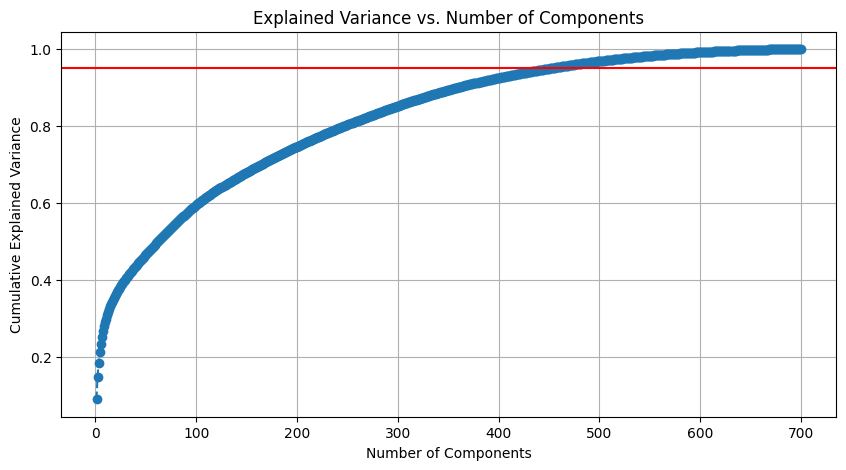

In [12]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## GLCM PCA

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_glcm)

In [15]:
pca = PCA()
pca.fit(X_scaled)

PCA()

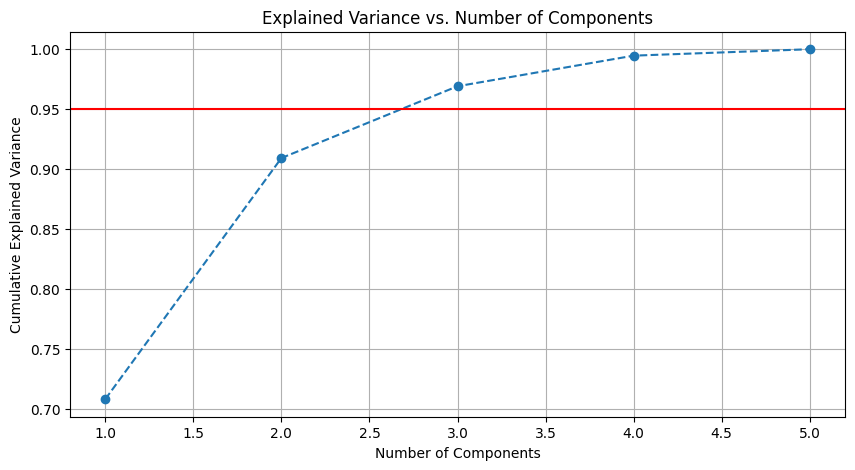

In [16]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## Resnet PCA

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_resnet)

In [18]:
pca = PCA()
pca.fit(X_scaled)

PCA()

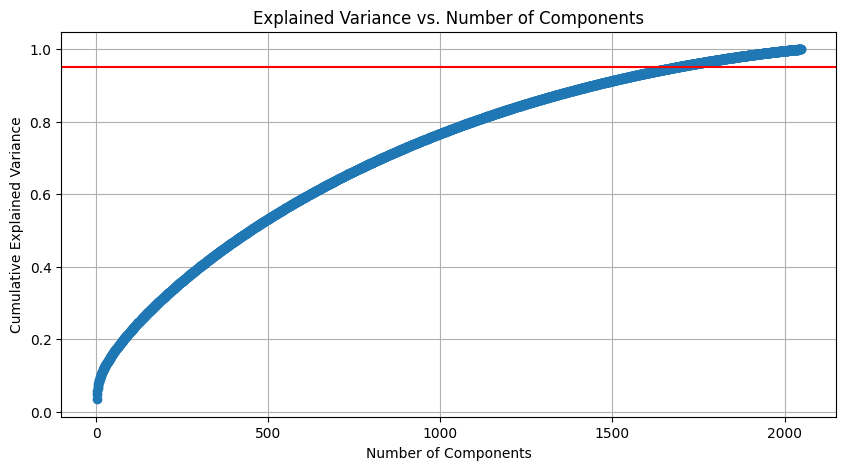

In [19]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [20]:
print(train_resnet.shape)
print(train_hog.shape)
print(train_glcm.shape)

(8430, 2048)
(8430, 700)
(8430, 5)


## Data Prep

In [21]:
resnet_scaler = StandardScaler()
hog_scaler = StandardScaler()
glcm_scaler = StandardScaler()

In [22]:
train_resnet_scaled = resnet_scaler.fit_transform(train_resnet)
train_hog_scaled = hog_scaler.fit_transform(train_hog)
train_glcm_scaled = glcm_scaler.fit_transform(train_glcm)

In [23]:
val_resnet_scaled = resnet_scaler.fit_transform(val_resnet)
val_hog_scaled = hog_scaler.fit_transform(val_hog)
val_glcm_scaled = glcm_scaler.fit_transform(val_glcm)

## Simple Classification

In [29]:
X_train = np.hstack([train_hog_scaled, train_glcm_scaled])
X_val = np.hstack([val_hog_scaled, val_glcm_scaled])

y_train = train_labels
y_val = val_labels

In [30]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

0.8026097271648873
0.49428162973552536


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
clf_sgd = SGDClassifier(max_iter=40, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.772479240806643
0.5532523230879199


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [32]:
clf_svm_lin = svm.LinearSVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm_lin.score(X_train, y_train))
print(clf_svm_lin.score(X_val, y_val))

0.8334519572953737
0.5250178699070764


In [33]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9029655990510083
0.5507505360972123


In [34]:
clf_hist = HistGradientBoostingClassifier(class_weight='balanced').fit(X_train, y_train)
print(clf_hist.score(X_train, y_train))
print(clf_hist.score(X_val, y_val))

1.0
0.6308077197998571


## Complex Classification

In [35]:
X_train = train_resnet_scaled
X_val = val_resnet_scaled

y_train = train_labels
y_val = val_labels

In [36]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

1.0
0.7930664760543246


In [37]:
clf_sgd = SGDClassifier(max_iter=40, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.9977461447212337
0.7326661901358112


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [38]:
clf_svm_lin = svm.LinearSVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm_lin.score(X_train, y_train))
print(clf_svm_lin.score(X_val, y_val))

1.0
0.7505360972122945


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [39]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9907473309608541
0.818084345961401


In [40]:
clf_hist = HistGradientBoostingClassifier(class_weight='balanced').fit(X_train, y_train)
print(clf_hist.score(X_train, y_train))
print(clf_hist.score(X_val, y_val))

1.0
0.7416011436740529


## All Feature

In [41]:
X_train = np.hstack([train_hog_scaled, train_glcm_scaled, train_resnet_scaled])
X_val = np.hstack([val_hog_scaled, val_glcm_scaled, val_resnet_scaled])

y_train = train_labels
y_val = val_labels

In [42]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

1.0
0.8045032165832737


In [43]:
clf_sgd = SGDClassifier(max_iter=40, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.9979833926453143
0.7494639027877055


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [44]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9932384341637011
0.8034310221586848


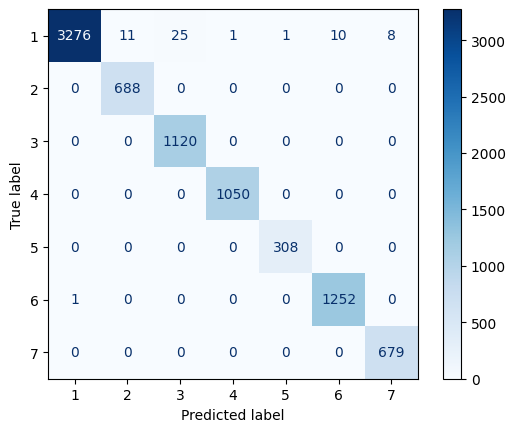

In [45]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

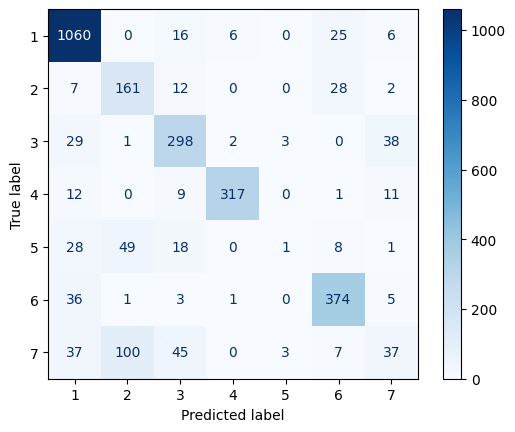

In [46]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

## Compression

In [80]:
pca = PCA(600)
pca.fit(train_resnet_scaled)

PCA(n_components=600)

In [81]:
X_train = np.hstack([pca.transform(train_resnet_scaled)])
X_val = np.hstack([pca.transform(val_resnet_scaled)])

y_train = train_labels
y_val = val_labels

In [82]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9876631079478054
0.8134381701215153


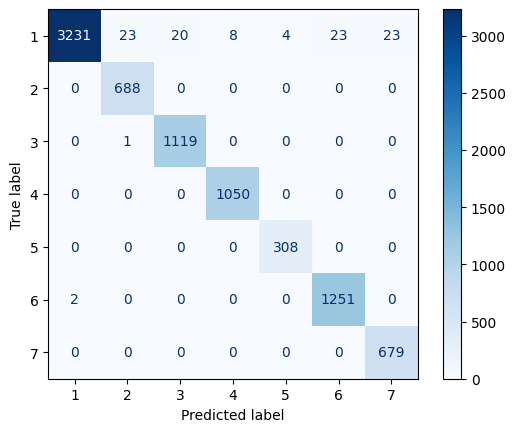

In [83]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

**PCA improved performance for minority classes**

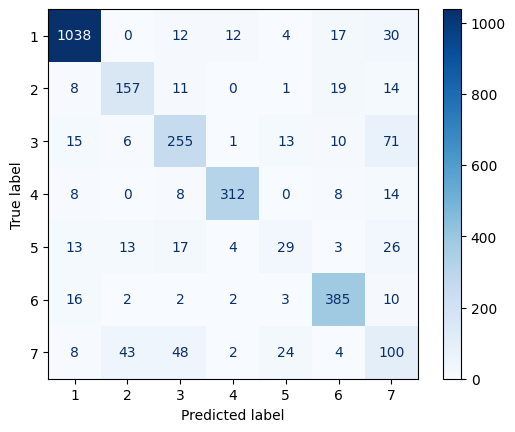

In [84]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform on HOG+

In [116]:
pca = PCA(500)
pca.fit(train_hog_scaled)

PCA(n_components=500)

In [117]:
X_train = np.hstack([pca.transform(train_hog_scaled)])
X_val = np.hstack([pca.transform(val_hog_scaled)])

y_train = train_labels
y_val = val_labels

In [118]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.8811387900355871
0.5257326661901358


**Original default SVM without PCA for Hog+**

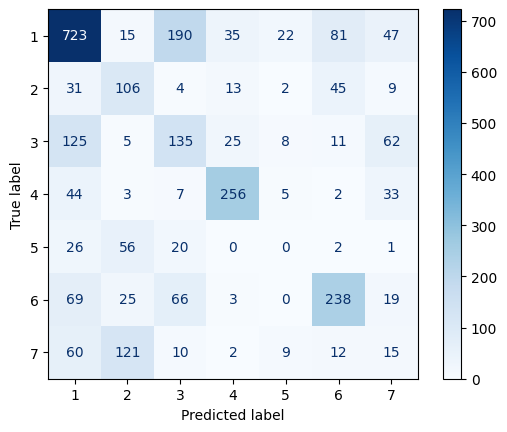

In [ ]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

**After PCA**

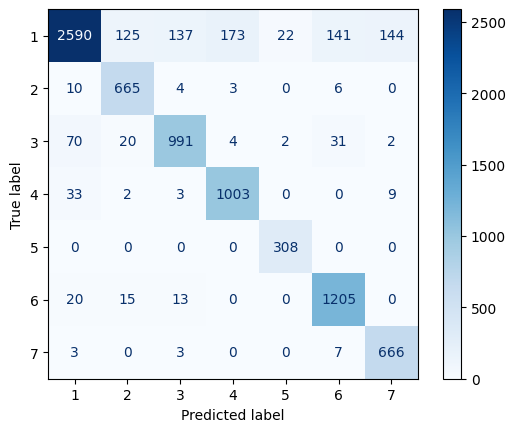

In [119]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

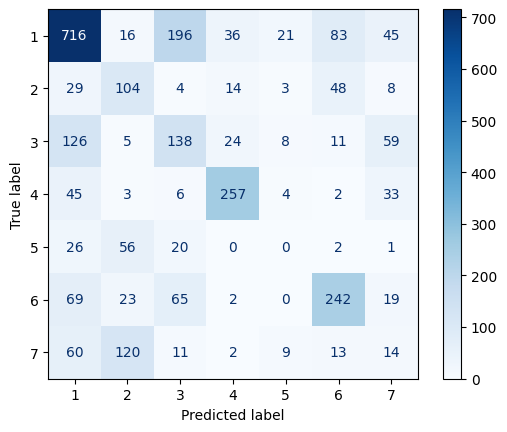

In [120]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

Perform on GLCM

In [124]:
X_train = np.hstack([train_glcm])
X_val = np.hstack([val_glcm])

y_train = train_labels
y_val = val_labels

No need to PCA

In [125]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.5712930011862396
0.4749821300929235


## Grid Search

In [126]:
pca_resnet = PCA(600)
pca_hog = PCA(500)

pca_resnet.fit(train_resnet_scaled)
pca_hog.fit(train_hog_scaled)

PCA(n_components=500)

In [127]:
# GLCM was saved already standard scaled
X_train = np.hstack([pca_hog.transform(train_hog_scaled), train_glcm, pca_resnet.transform(train_resnet_scaled)])
X_val = np.hstack([pca_hog.transform(val_hog_scaled), val_glcm, pca_resnet.transform(val_resnet_scaled)])

y_train = train_labels
y_val = val_labels

In [128]:
X_combined = np.concatenate([X_train, X_val], axis=0)
y_combined = np.concatenate([y_train, y_val], axis=0)
test_fold = np.concatenate([-1 * np.ones(len(X_train), dtype=int), np.zeros(len(X_val), dtype=int)])

In [138]:
param_grid = [
  {'C': [4, 5, 6, 7.5, 10, 15], 'gamma': ['scale', 0.00007, 0.0001, 0.0002, 0.0003, 0.0005], 'kernel': ['rbf']},
]

ps = PredefinedSplit(test_fold)

clf = GridSearchCV(svm.SVC(class_weight='balanced'),
    param_grid=param_grid,
    n_jobs=2,
    pre_dispatch="n_jobs",
    cv=ps).fit(X_combined, y_combined)

In [139]:
clf.best_params_

{'C': 4, 'gamma': 0.0003, 'kernel': 'rbf'}

In [140]:
clf.best_score_

0.8148677626876341

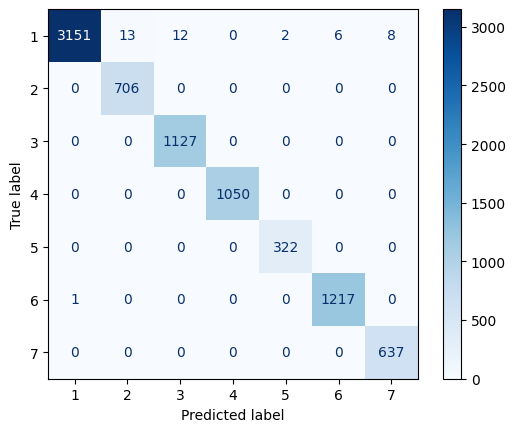

In [87]:
cm = confusion_matrix(y_train, clf.best_estimator_.predict(X_train), labels = clf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

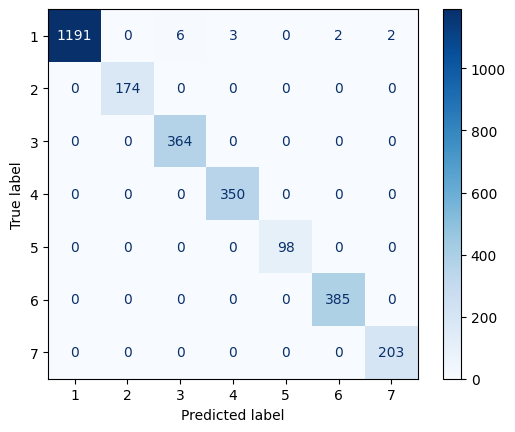

In [88]:
cm = confusion_matrix(y_val, clf.best_estimator_.predict(X_val), labels = clf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

In [141]:
clf.best_estimator_

SVC(C=4, class_weight='balanced', gamma=0.0003)

In [142]:
clf_svm = svm.SVC(class_weight='balanced', C=4, gamma=0.0003).fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9995255041518387
0.8148677626876341


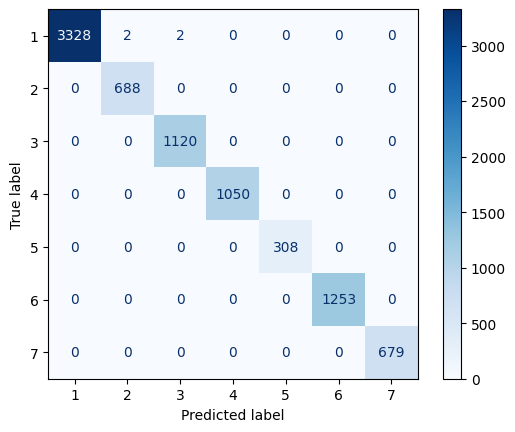

In [143]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

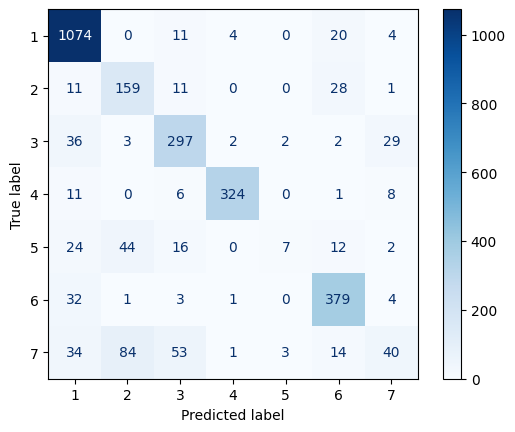

In [144]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()